In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.offline as pyo
pyo.init_notebook_mode()

import plotly.express as px

In [3]:
df_melb = pd.read_csv('melb_data.csv')
df_melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ MB


In [4]:
df_melb

Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin   3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0   
1        Biggin   4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0   
2        Biggin   4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0   
3        Biggin   4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0   
4        Nelson   4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0   
...         ...         ...       ...       ...  ...       ...  ...       ...   
13575     Barry  26/08/2017      16.7    3150.0  ...       2.0  2.0     652.0   
13576  Williams  26/08/2017       6.8    3016.0  ...       2.0  2.0     333.0   
13577     Raine  26/08/2017       6.8    3016.0  ...       2.0  4.0     436.0   
13578   Sweeney  26/08/2017       6.8    3016.0  ...       1.0  5.0     866.0   
13579   Village  26/08/2017       6.3    3013.0  ...       1.0  1.0     362.0   

       BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
0               NaN        NaN        Yarra -37.79960   144.99840   
1              79.0     1900.0        Yarra -37.80790   144.99340   
2             150.0     1900.0        Yarra -37.80930   144.99440   
3               NaN        NaN        Yarra -37.79690   144.99690   
4             142.0     2014.0        Yarra -37.80720   144.99410   
...             ...        ...          ...       ...         ...   
13575           NaN     1981.0          NaN -37.90562   145.16761   
13576         133.0     1995.0          NaN -37.85927   144.87904   
13577           NaN     1997.0          NaN -37.85274   144.88738   
13578         157.0     1920.0          NaN -37.85908   144.89299   
13579         112.0     1920.0          NaN -37.81188   144.88449   

                       Regionname Propertycount  
0           Northern Metropolitan        4019.0  
1           Northern Metropolitan        4019.0  
2           Northern Metropolitan        4019.0  
3           Northern Metropolitan        4019.0  
4           Northern Metropolitan        4019.0  
...                           ...           ...  
13575  South-Eastern Metropolitan        7392.0  
13576        Western Metropolitan        6380.0  
13577        Western Metropolitan        6380.0  
13578        Western Metropolitan        6380.0  
13579        Western Metropolitan        6543.0  

[13580 rows x 21 columns]

In [157]:
df_melb['Date'] = pd.to_datetime(df_melb['Date'])
df_melb['CouncilArea'].describe(())

/Users/luxuran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count         6196
unique          31
top       Moreland
freq           658
Name: CouncilArea, dtype: object

In [6]:
df_melb.isnull().sum().sort_values(ascending=False)
df_melb = df_melb.dropna()#just for easy visualization

In [7]:
df_melb

Suburb          Address  Rooms Type      Price Method  \
1        Abbotsford  25 Bloomburg St      2    h  1035000.0      S   
2        Abbotsford     5 Charles St      3    h  1465000.0     SP   
4        Abbotsford      55a Park St      4    h  1600000.0     VB   
6        Abbotsford     124 Yarra St      3    h  1876000.0      S   
7        Abbotsford    98 Charles St      2    h  1636000.0      S   
...             ...              ...    ...  ...        ...    ...   
12205    Whittlesea    30 Sherwin St      3    h   601000.0      S   
12206  Williamstown      75 Cecil St      3    h  1050000.0     VB   
12207  Williamstown    2/29 Dover Rd      1    u   385000.0     SP   
12209       Windsor  201/152 Peel St      2    u   560000.0     PI   
12212    Yarraville  54 Pentland Pde      6    h  2450000.0     VB   

             SellerG       Date  Distance  Postcode  ...  Bathroom  Car  \
1             Biggin 2016-04-02       2.5    3067.0  ...       1.0  0.0   
2             Biggin 2017-04-03       2.5    3067.0  ...       2.0  0.0   
4             Nelson 2016-04-06       2.5    3067.0  ...       1.0  2.0   
6             Nelson 2016-07-05       2.5    3067.0  ...       2.0  0.0   
7             Nelson 2016-08-10       2.5    3067.0  ...       1.0  2.0   
...              ...        ...       ...       ...  ...       ...  ...   
12205            Ray 2017-07-29      35.5    3757.0  ...       2.0  1.0   
12206       Williams 2017-07-29       6.8    3016.0  ...       1.0  0.0   
12207       Williams 2017-07-29       6.8    3016.0  ...       1.0  1.0   
12209  hockingstuart 2017-07-29       4.6    3181.0  ...       1.0  1.0   
12212        Village 2017-07-29       6.3    3013.0  ...       3.0  2.0   

       Landsize  BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
1         156.0         79.00     1900.0        Yarra -37.80790   144.99340   
2         134.0        150.00     1900.0        Yarra -37.80930   144.99440   
4         120.0        142.00     2014.0        Yarra -37.80720   144.99410   
6         245.0        210.00     1910.0        Yarra -37.80240   144.99930   
7         256.0        107.00     1890.0        Yarra -37.80600   144.99540   
...         ...           ...        ...          ...       ...         ...   
12205     972.0        149.00     1996.0   Whittlesea -37.51232   145.13282   
12206     179.0        115.00     1890.0  Hobsons Bay -37.86558   144.90474   
12207       0.0         35.64     1967.0  Hobsons Bay -37.85588   144.89936   
12209       0.0         61.60     2012.0  Stonnington -37.85581   144.99025   
12212    1087.0        388.50     1920.0  Maribyrnong -37.81038   144.89389   

                  Regionname Propertycount  
1      Northern Metropolitan        4019.0  
2      Northern Metropolitan        4019.0  
4      Northern Metropolitan        4019.0  
6      Northern Metropolitan        4019.0  
7      Northern Metropolitan        4019.0  
...                      ...           ...  
12205      Northern Victoria        2170.0  
12206   Western Metropolitan        6380.0  
12207   Western Metropolitan        6380.0  
12209  Southern Metropolitan        4380.0  
12212   Western Metropolitan        6543.0  

[6196 rows x 21 columns]

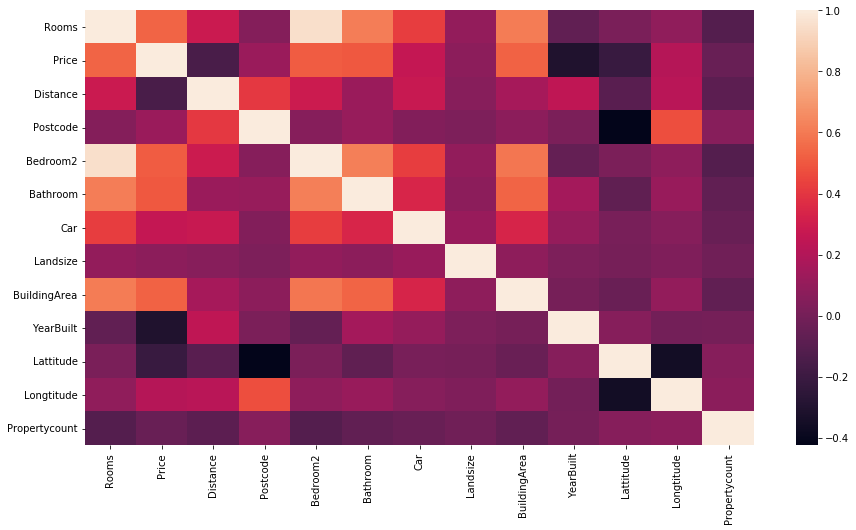

In [8]:
plt.rcParams["figure.figsize"]=15,8
sns.heatmap(df_melb.corr())

In [219]:
def Distribution(x_axis,axis):#Differences in the number of housing trades
    
    x_axis.sort_values() 
    xx = x_axis.unique() 
    yy = x_axis.value_counts()

    #print(xx)
    #print(yy)
    axis.bar(xx, yy, width=0.3, facecolor='#9999ff')
    a=np.arange(len(xx))
    for a,b in zip(a, yy):
        axis.text(a, b, '%.0f'%b, ha='center', va='bottom', fontsize=10)
    #axis.xticks(xx,fontsize=4)
    #axis.yticks(yy,fontsize=5)
    axis.set_title('Distribution by %s'%x_axis.name)
    
    

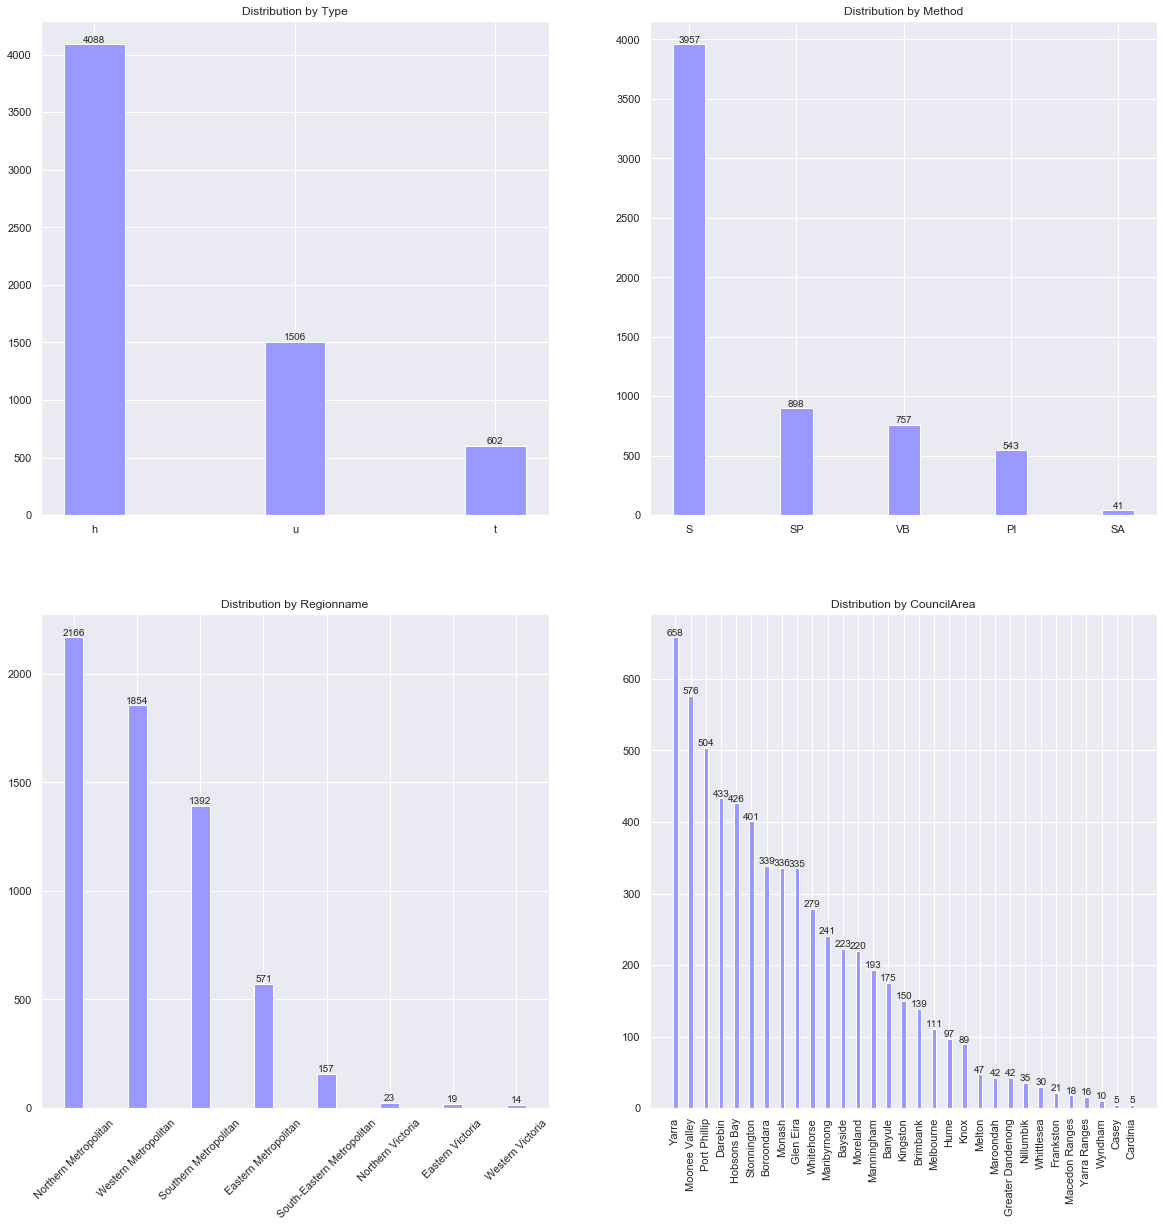

In [362]:

figure, axis = plt.subplots(2, 2)
plt.rcParams["figure.figsize"]=20,15 
Distribution(df_melb['Type'],axis[0,0])
Distribution(df_melb['Method'],axis[0,1])
Distribution(df_melb['Regionname'],axis[1,0])
Distribution(df_melb['CouncilArea'],axis[1,1])
axis[1,0].tick_params(axis='x', labelrotation=45)
axis[1,1].tick_params(axis='x', labelrotation=90)

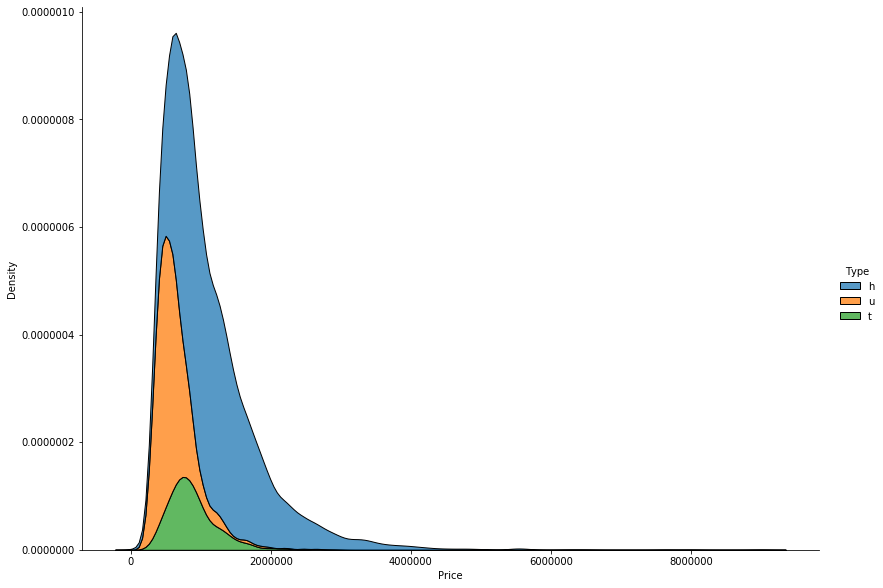

In [21]:
sns.displot(x="Price", data=df_melb, hue="Type", kind="kde", multiple="stack",height=8.27, aspect=11.7/8.27)#tried some seaborn

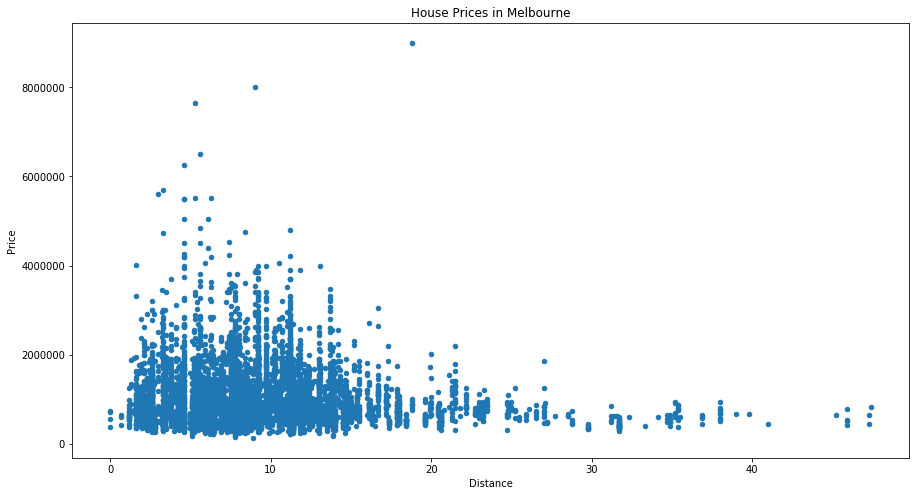

In [23]:
df_melb.plot(x='Distance', y='Price', kind='scatter',title='House Prices in Melbourne')#tried to plot with pandas directly

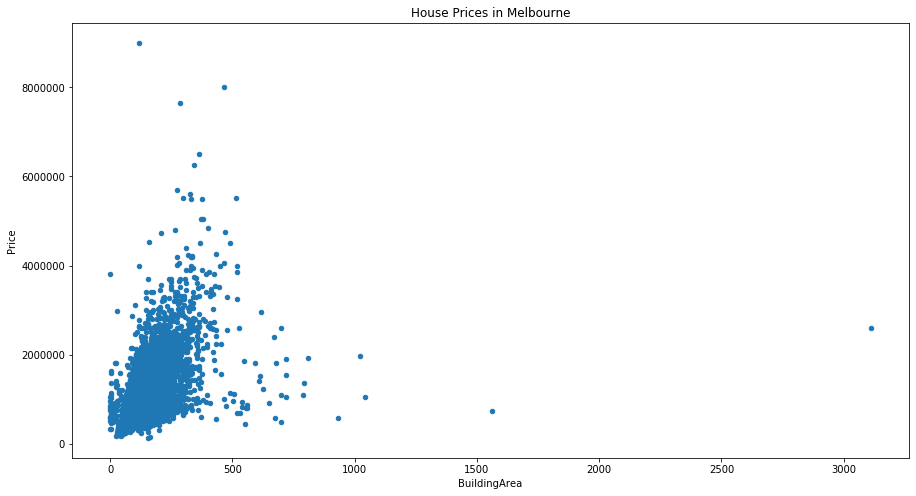

In [28]:
df_melb.plot(x='BuildingArea', y='Price', kind='scatter',title='House Prices in Melbourne')

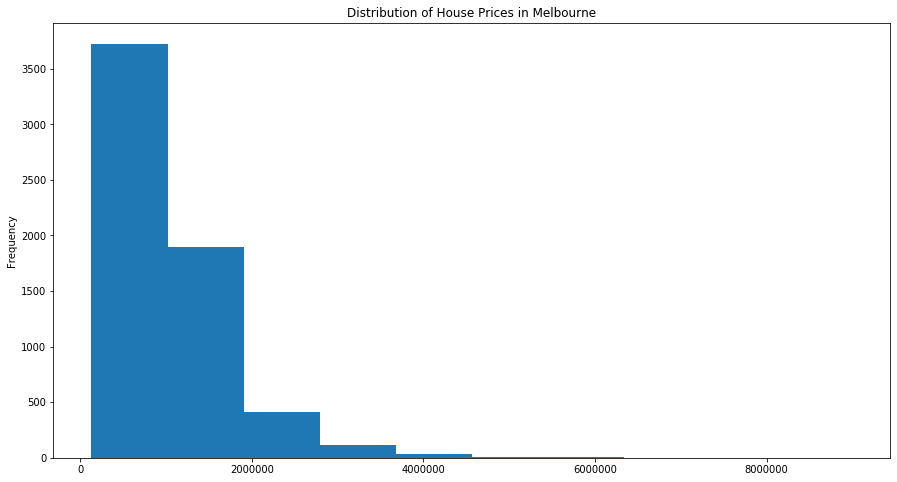

In [66]:
df_melb['Price'].plot(kind='hist',title='Distribution of House Prices in Melbourne')


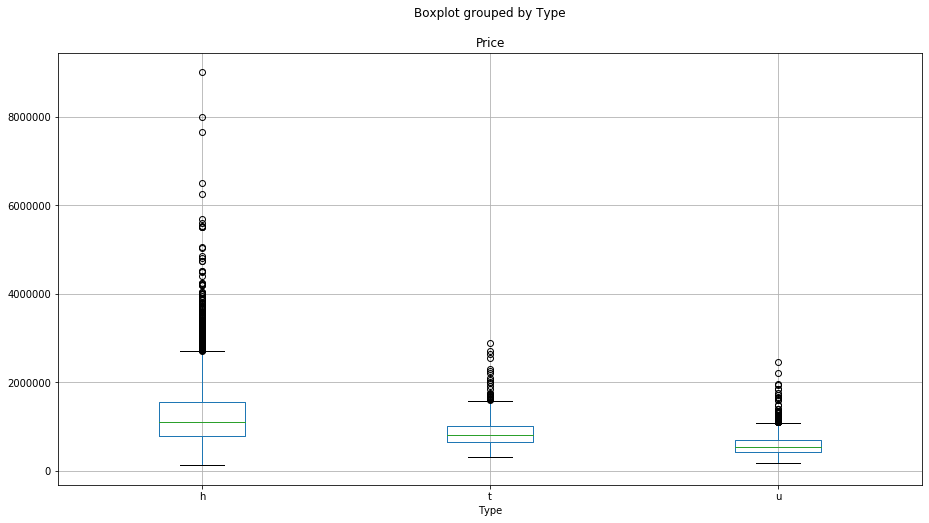

In [27]:
df_melb.boxplot(column='Price', by='Type')

In [337]:
def avg_price_bar(x, axis):
    avg_price = df_melb[[x,'Price']].groupby(x).mean().sort_values(by='Price', ascending=False)
    #print(avg_price)
    axis.bar(avg_price.index,avg_price['Price'],facecolor='#9999ff')
    a=np.arange(len(avg_price.index))
    for a,b in zip(a, avg_price['Price']):
        axis.text(a, b, '%.0f'%b, ha='center', va='bottom', fontsize=14)
    #plt.xticks(rotation=45)

    axis.set_title('Average house prices in regions')

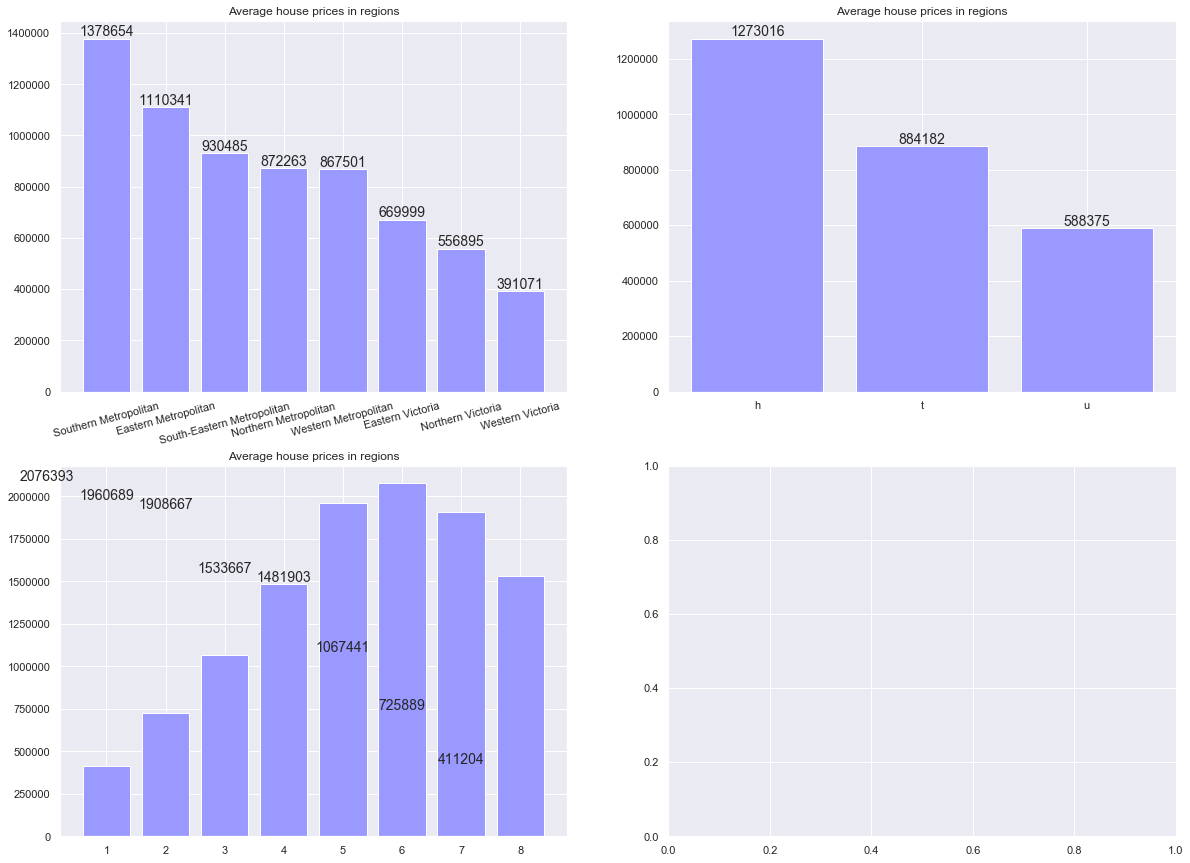

In [338]:
figure, axis = plt.subplots(2,2, figsize=(20, 15))
avg_price_bar('Regionname', axis[0,0])
avg_price_bar('Type', axis[0,1])
axis[0,0].tick_params(axis='x', labelrotation=15)
avg_price_bar('Rooms', axis[1,0])


             Price
Type              
h     1.273016e+06
t     8.841816e+05
u     5.883745e+05


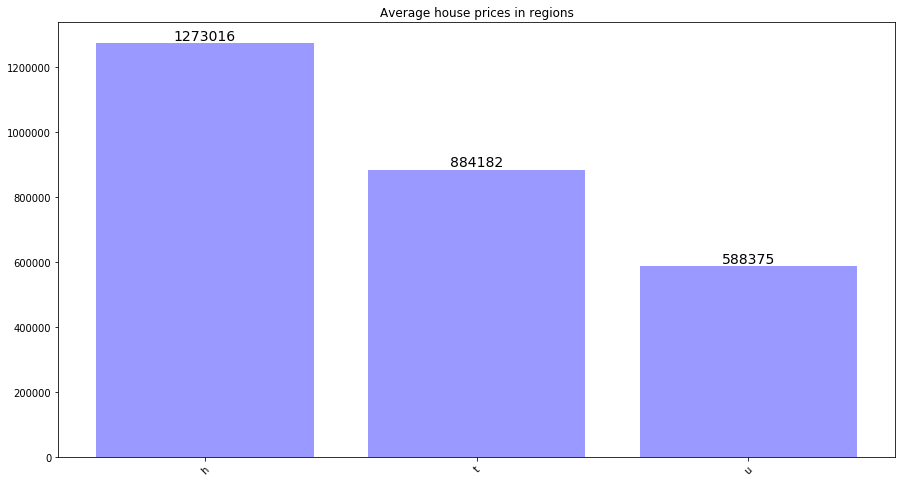

In [74]:
#avg_price_bar('Type')

In [98]:
months = df_melb[['Date','Price']].groupby(pd.Grouper(key='Date',freq='M')).mean().sort_values(by='Date', ascending=True)
print(months)

                   Price
Date                    
2016-03-31  1.214349e+06
2016-04-30  1.034289e+06
2016-05-31  1.066096e+06
2016-06-30  1.032916e+06
2016-07-31  9.937646e+05
2016-08-31  1.083825e+06
2016-09-30  1.048672e+06
2016-10-31  1.188132e+06
2016-11-30  1.263208e+06
2016-12-31  1.147341e+06
2017-01-31  8.614342e+05
2017-02-28  1.175492e+06
2017-03-31  1.109566e+06
2017-04-30  1.044364e+06
2017-05-31  1.102508e+06
2017-06-30  1.090207e+06
2017-07-31  8.524998e+05
2017-08-31  9.123487e+05
2017-09-30           NaN
2017-10-31           NaN
2017-11-30  9.338682e+05
2017-12-31  1.183031e+06


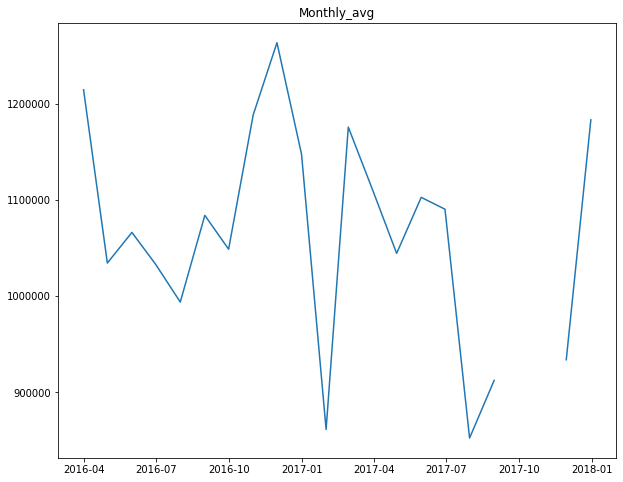

In [218]:
plt.title('Monthly_avg')
plt.plot(months.index, months['Price'])
plt.rcParams["figure.figsize"]=10,8
plt.show()

In [225]:
df_melb['month'] = df_melb['Date'].dt.to_period('M')

/Users/luxuran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

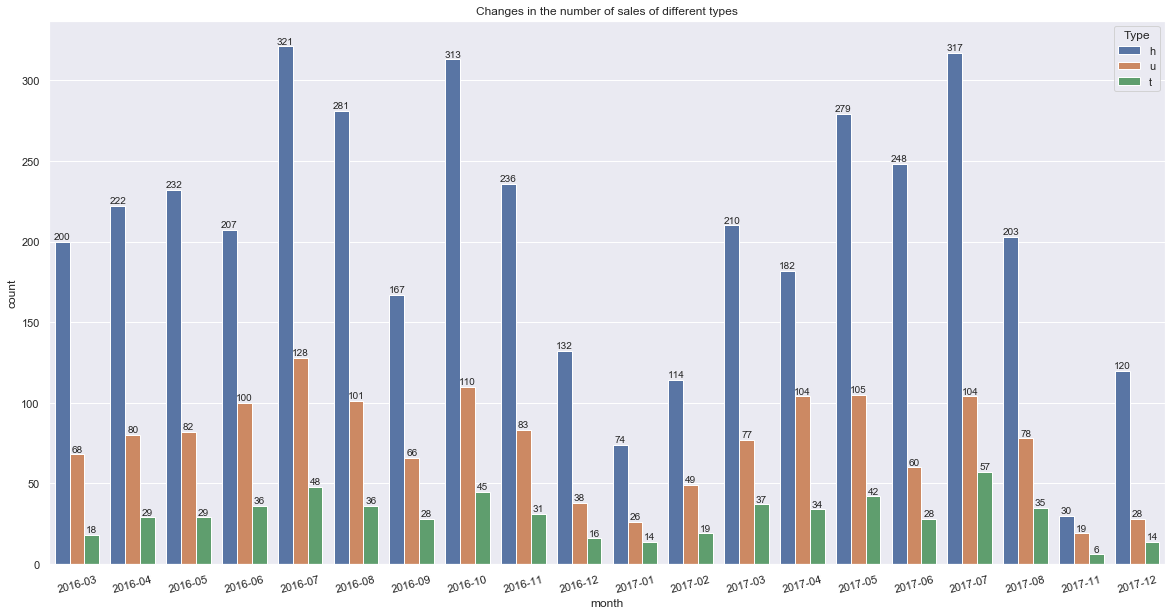

In [297]:
figure, axis = plt.subplots(figsize=(20, 10))
axis = sns.countplot(x="month", hue="Type", data=df_melb,order = df_melb['month'].sort_values().unique())
axis.set_title('Changes in the number of sales of different types')
for p in axis.patches:
    axis.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xticks(rotation=15)
#x_dates = df_melb['month'].sort_values().unique()
#axis.set_xticklabels(labels=x_dates, rotation=15, ha='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

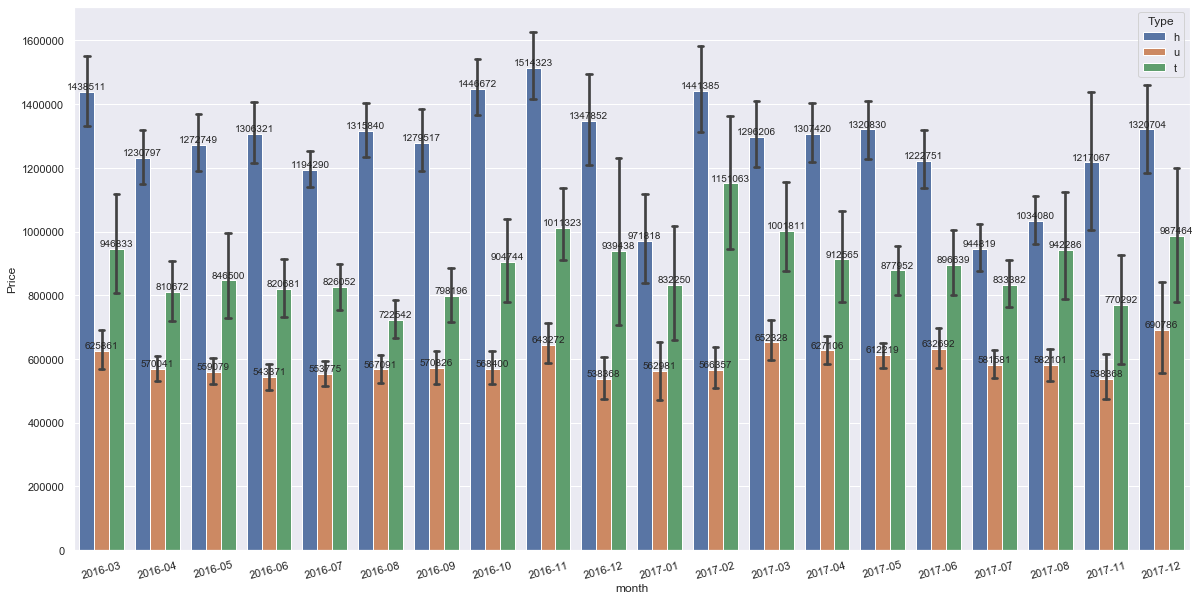

In [308]:
figure, axis = plt.subplots(figsize=(20, 10))
axis = sns.barplot(x="month", y="Price",hue = "Type", data=df_melb, capsize=.1,order = df_melb['month'].sort_values().unique())
for p in axis.patches:
    axis.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xticks(rotation=15)

(array([736055., 736146., 736238., 736330., 736420., 736511., 736603.,
        736695.]), <a list of 8 Text xticklabel objects>)

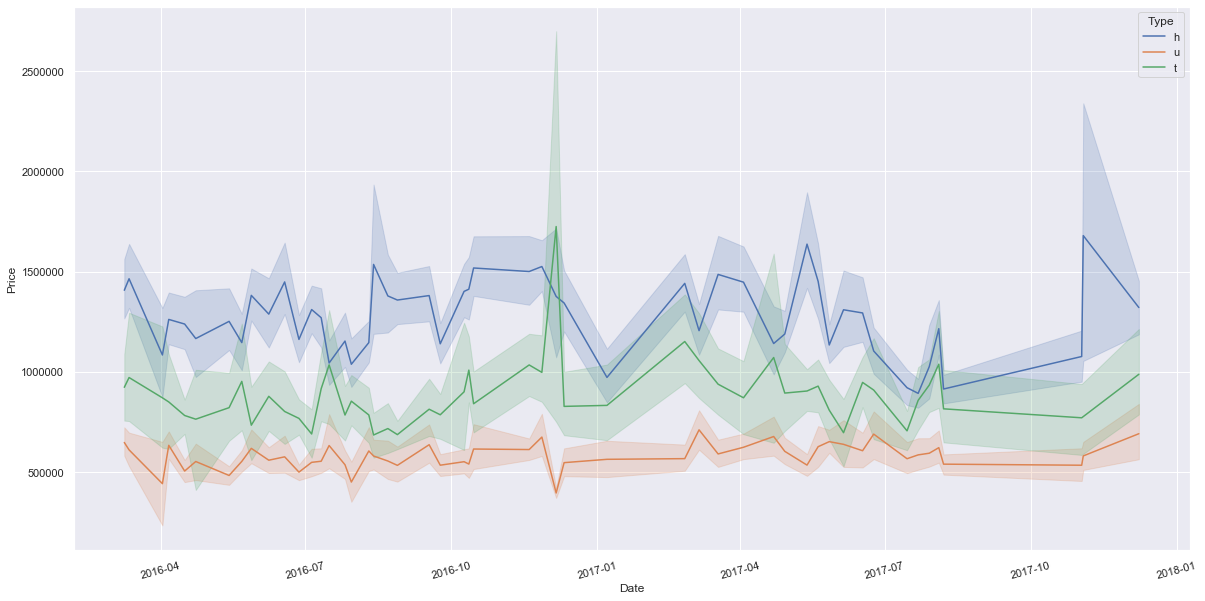

In [307]:
figure, axis = plt.subplots(figsize=(20, 10))
axis = sns.lineplot(x="Date", y="Price",hue = "Type", data=df_melb)

plt.xticks(rotation=15)

In [359]:

avg_price = df_melb[['Type','Price']].groupby('Type').mean().sort_values(by='Price', ascending=False)
print(avg_price)

fig = px.bar(avg_price, x=avg_price.index, y='Price')
fig.show()
#fig = px.bar(avg_price, x = 'month',y = 'Price')
#fig.show()

             Price
Type              
h     1.273016e+06
t     8.841816e+05
u     5.883745e+05


In [361]:

avg_price = df_melb[['month','Price']].groupby('month').mean().sort_values(by='Price', ascending=False)
print(avg_price)

fig = px.bar(avg_price, x=avg_price.index, y='Price')
fig.show()

                Price
month                
2016-11  1.263208e+06
2016-03  1.214349e+06
2016-10  1.188132e+06
2017-12  1.183031e+06
2017-02  1.175492e+06
2016-12  1.147341e+06
2017-03  1.109566e+06
2017-05  1.102508e+06
2017-06  1.090207e+06
2016-08  1.083825e+06
2016-05  1.066096e+06
2016-09  1.048672e+06
2017-04  1.044364e+06
2016-04  1.034289e+06
2016-06  1.032916e+06
2016-07  9.937646e+05
2017-11  9.338682e+05
2017-08  9.123487e+05
2017-01  8.614342e+05
2017-07  8.524998e+05


TypeError: Object of type Period is not JSON serializable